[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP90086-Practical-Solutions/blob/master/Week%202/workshop02_solution.ipynb)

In [51]:
%%html
<marquee style='width: 50%; color: white; font-size:35px;' scrollamount=20><b>WELCOME TO COMP90086!</b></marquee>

## Boring stuff
- My full name is Tuan Khoi Nguyen, and you can call me **Khoi**
- Master of Engineering (Mechatronics) - Just started my 2nd year
- Email: `tuankhoi@unimelb.edu.au` || `tuankhoin@student.unimelb.edu.au`

| If... | Email me | Email Jiayang |
|---|---|---|
Questions on subject content | ✅ | ✅ |
'HOmEwOrk aTe mY dOG' | | ✅ |
'Gimme marks' | | ✅ |
'My homie AFK / MIA' | | ✅ |
Landscape/Astro photography | ✅ | |
Hiking | ✅ | |
Music jam sesh | ✅ | |
Dank memes | ✅ | |

## Facts
- May swear during teaching (sorry in advance)
- Know Vietnamese restaurants that are actually good in Melbourne

In [52]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/My Drive/COMP90086 (T)/Week 2/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# COMP90086 Computer Vision

### What are we using?
- Python 3.x
- Jupyter Notebook

Just so?
- `numpy`
- `opencv`
- `matplotlib`
- `scikit-learn`
- `tensorflow`
- Additional self-learning recommendation: `scipy`, `pandas`, `pytorch`

### Do you even Notebook?
- `pip`/`apt-get`/`brew`
- Anaconda
- VSCode & friends
- Google Colab
- What else?

### Workshops
The combination of tutorials and practicals: you will revise what you have learned in the lectures, ask questions, and do coding exercises.

## Week 2: Image Processing

* Python library review (Look at your worksheet)
* Image Basics review
* Image processing on Python:

  1. **Read image** 

  2. **Resize image** to using bicubic interpolation method. 

  3. **Crop** center region of resized image. 

  4. Generate a deep **copy** of the crop image. Set the red channel of the copy  image to be the average value of the green channel and blue channel for each pixel. 

  5. **`matplotlib` review:** Put the images in step 1-4 in different plots of a figure. Set up a **subplot grid** with height 2 and width 2. 

**Please place this .ipynb in the same path as the "kodim23.png" image, i.e. in the "week2" folder**

## Lecture Review
* Do you think the depth of field in this image is big or small. What happens if it is bigger?
* What happens if barrel or pincushion disortion happens?

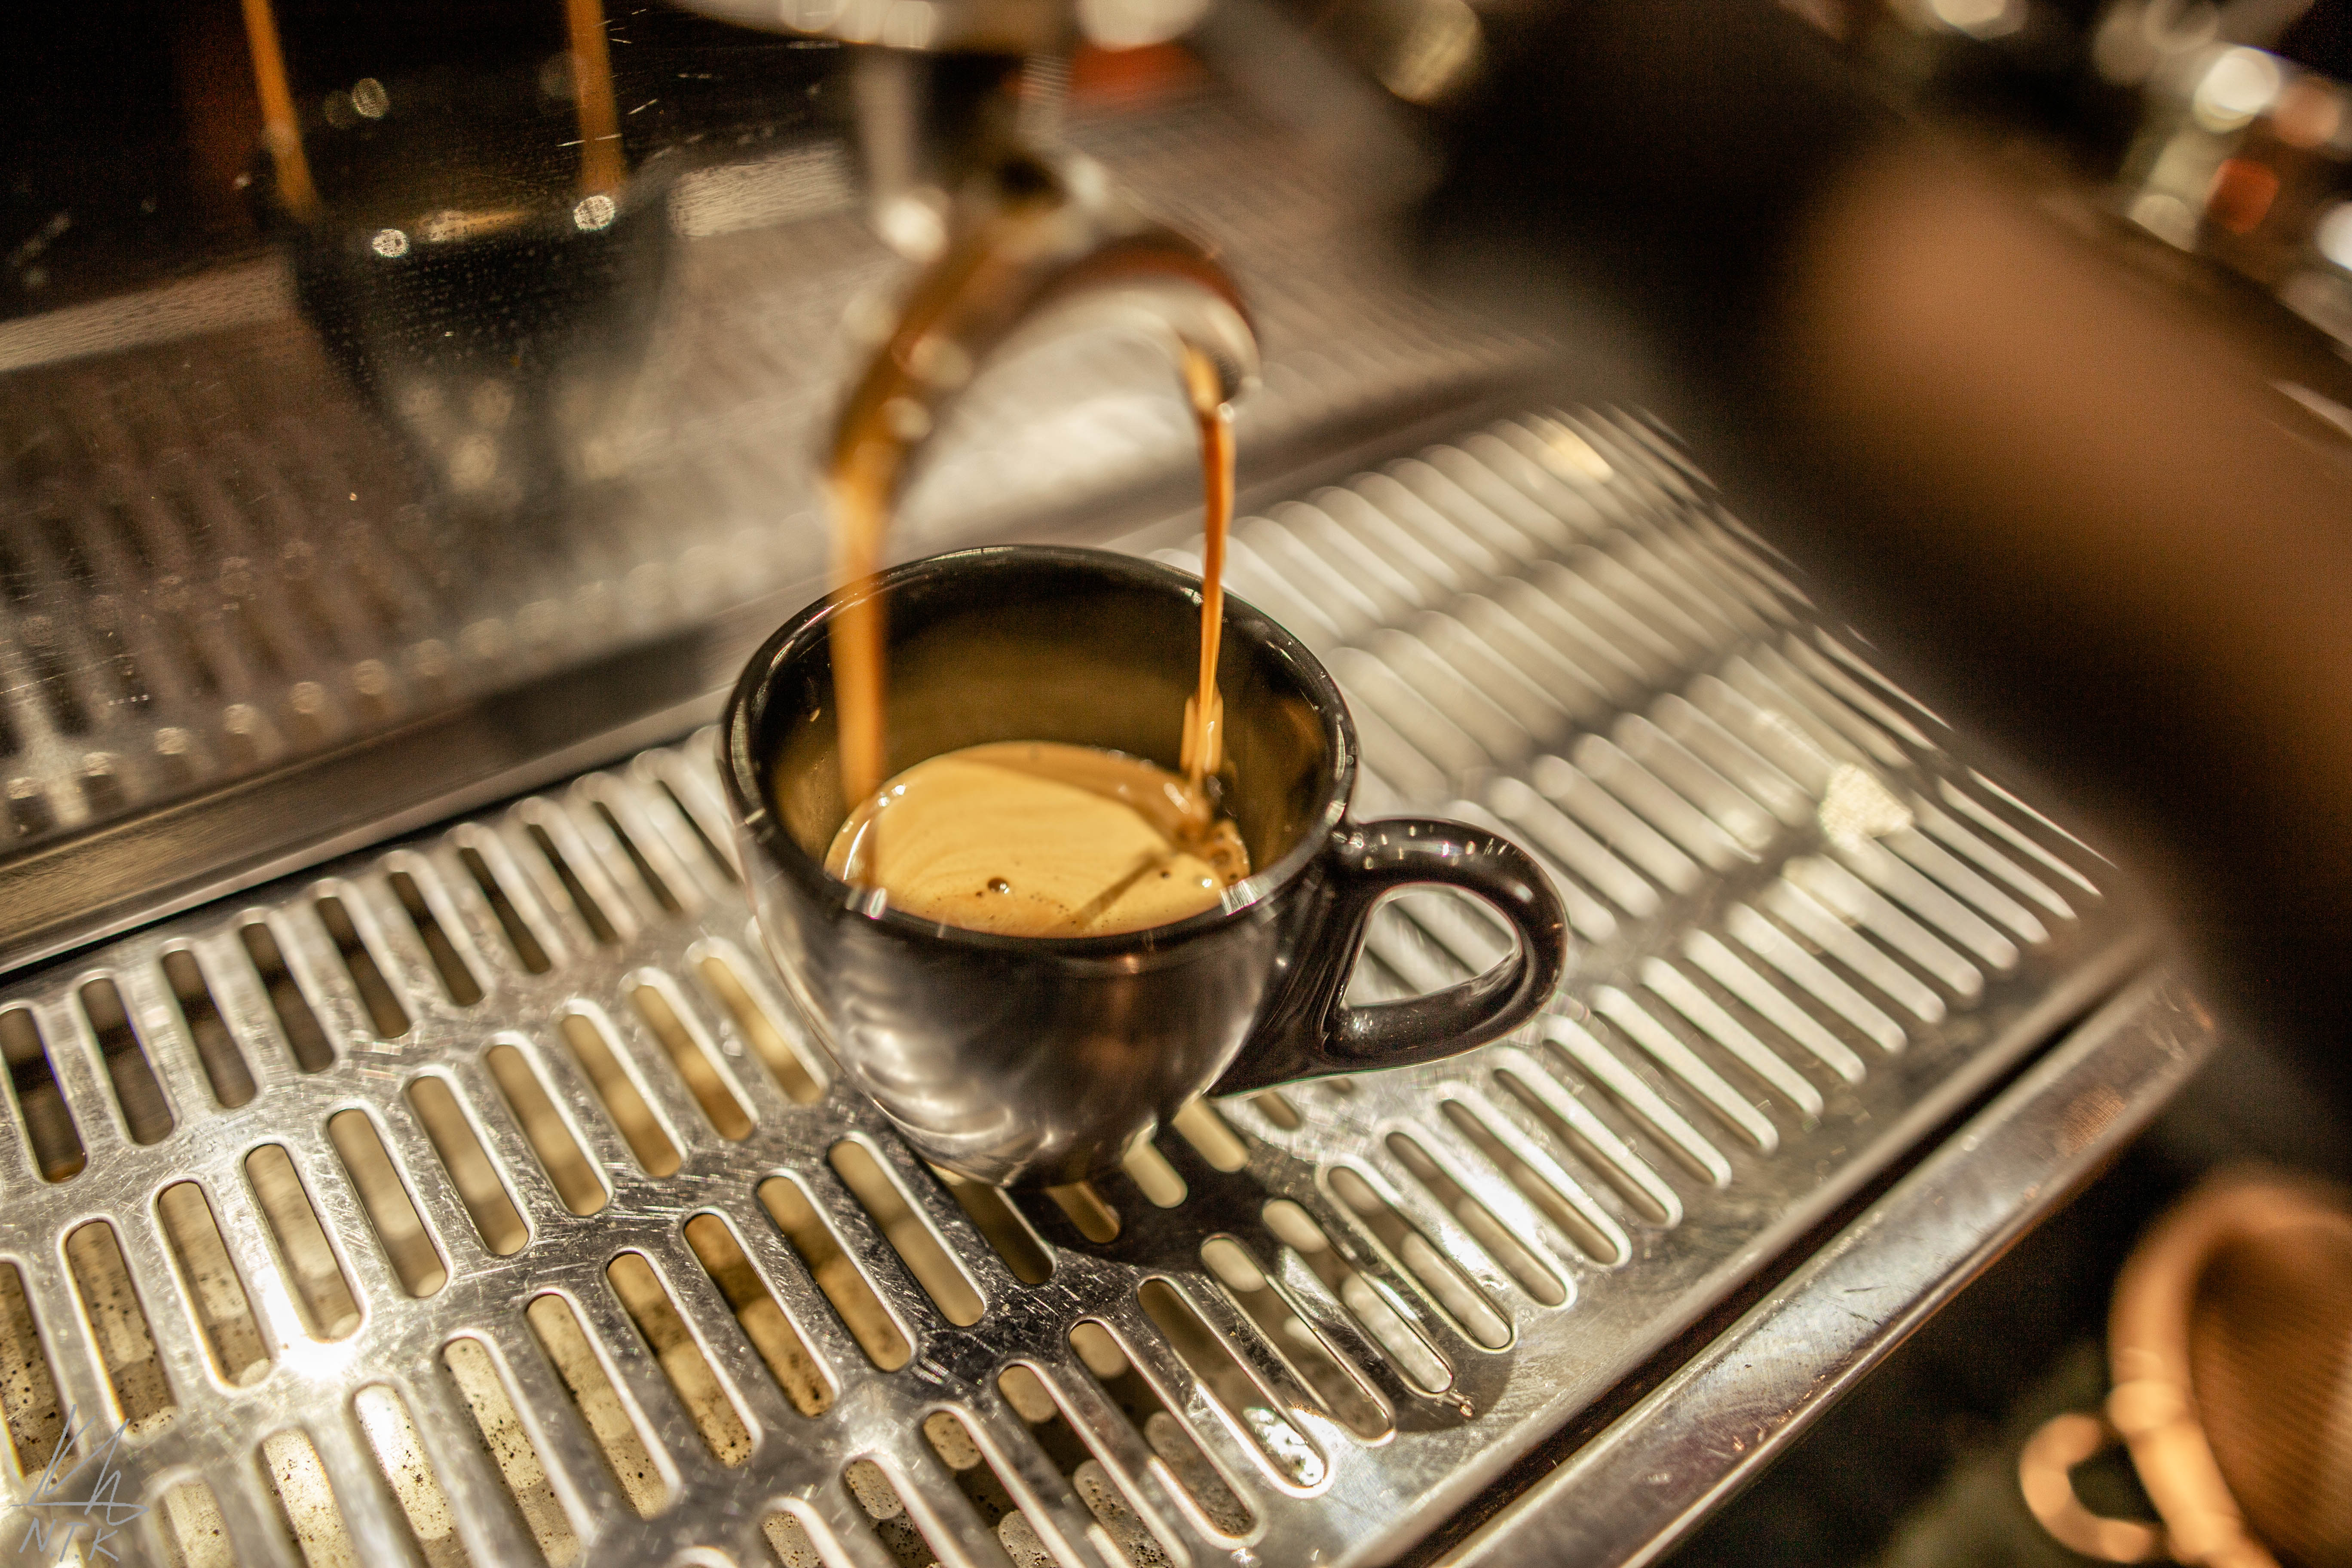

(1) Read the bird image

In [70]:
# Notice here: `import cv2`, but not `pip install cv2`!
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


What is happening here?


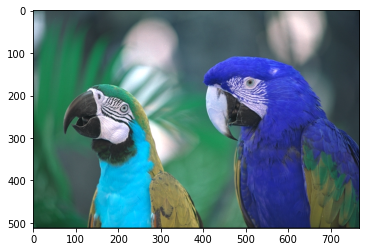

In [53]:
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

bird = cv2.imread(path + "kodim23.png")
plt.imshow(bird)
print("What is happening here?")

In [54]:
def convey_img(image):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since 
      return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

Do you know which image represents which channel?


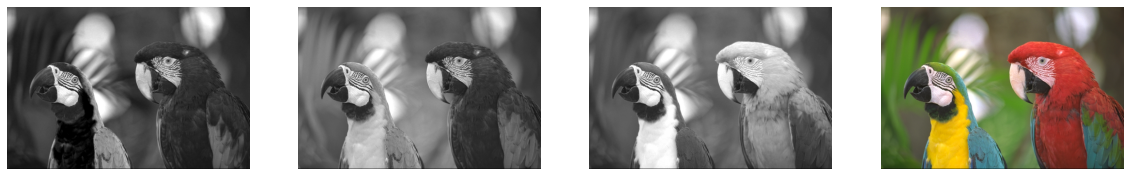

In [55]:
fig, ax = plt.subplots(1,4,figsize=(20,10))

print("Do you know which image represents which channel?")
for i in range(3):
  ax[i].imshow(convey_img(bird[:,:,i]))
  ax[i].axis('off')
ax[3].imshow(convey_img(bird))
ax[3].axis('off')
plt.show()


(2) Resize the image to (224,224) using bicubic interpolation method.

Facts: Colored images are read by OpenCV in the channel order BGR, but we need to process it in RGB order ➡ Convert BGR to RGB is essential.

In [56]:
new_width=224
new_height=224

resize_img = cv2.resize(bird, 
                        (new_width, new_height),
                        interpolation = cv2.INTER_CUBIC)

In [57]:
resize_img.shape

(224, 224, 3)

(3) crop the center region of the resized image. The crop size is 128 for width and 156 for height.

How image coordinates are read: ↘

||||
|---|---|---|
|0,0|1,0|2,0|
|0,1|1,1|2,1|
|0,2|1,2|2,2|

In [58]:
def crop_center(image, crop_size_w, crop_size_h): # we assume that crop_size is the same for both width and height. we can set different values.
    height = image.shape[0] 
    width = image.shape[1] 
    upper_crop = (height-crop_size_h)//2  
    left_crop = (width-crop_size_w)//2 
    return image[upper_crop : upper_crop + crop_size_h,
                 left_crop : left_crop + crop_size_w,
                 :]

center_crop = crop_center(resize_img,128,156)
center_crop.shape

(156, 128, 3)

Question: The variables `upper_crop`, `upper_crop + crop_size_h`, `left_crop`, `left_crop + crop_size_w` corresponds to which edge of the image?

(4) generate a deep copy of the crop image. Set the red channel of the copy image to be the average value of the green channel and blue channel for each pixel.

In [63]:
copy_img = center_crop.copy()
# R = (B+G)/2
copy_img[:,:,2] = (copy_img[:,:,0]+copy_img[:,:,1])/2

(5) put the images in step 1-4 in different plots of a figure. Set up a subplot grid with height 2 and width 2.

In [64]:
# Remember to swap the color channels before plotting
bird_s = convey_img(bird)
resize_img_s = convey_img(resize_img)
center_crop_s = convey_img(center_crop)
copy_img_s = convey_img(copy_img)

Original answer

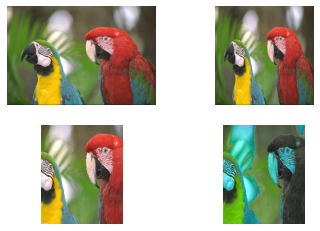

In [65]:
plt.subplot(2, 2, 1)
plt.imshow(bird_s)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(resize_img_s)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(center_crop_s)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(copy_img_s)
plt.axis('off')

plt.show()

Another answer

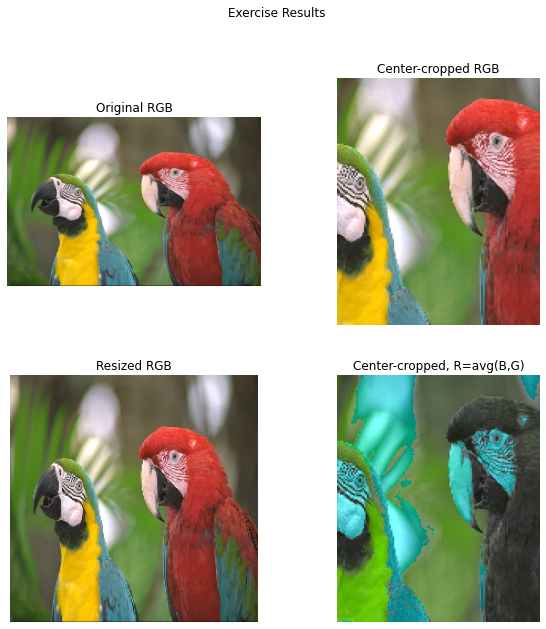

In [66]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].imshow(bird_s)
ax[0,0].set_title('Original RGB')
ax[0,0].axis('off')

ax[1,0].imshow(resize_img_s)
ax[1,0].set_title('Resized RGB')
ax[1,0].axis('off')

ax[0,1].imshow(center_crop_s)
ax[0,1].set_title('Center-cropped RGB')
ax[0,1].axis('off')

ax[1,1].imshow(copy_img_s)
ax[1,1].set_title('Center-cropped, R=avg(B,G)')
ax[1,1].axis('off')

plt.suptitle('Exercise Results')
plt.show()